## Importing the required modules

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

## Reading the dataset

In [4]:
df = pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


## Information of the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## Dealing with categorical values

In [8]:
df['Gender'] = pd.get_dummies(df['Gender'],drop_first=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Gender                  200 non-null    uint8
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
dtypes: int64(4), uint8(1)
memory usage: 6.6 KB


## Comparing the correlation of the columsn with the score column

In [26]:
corr_target = abs(df.corr()['Spending Score (1-100)'])
relevent_features = corr_target[corr_target>0]
relevent_features

CustomerID                0.013835
Gender                    0.058109
Age                       0.327227
Annual Income (k$)        0.009903
Spending Score (1-100)    1.000000
Name: Spending Score (1-100), dtype: float64

In [34]:
data = list(zip(df['Age'],df['Spending Score (1-100)']))
print(data)

[(19, 39), (21, 81), (20, 6), (23, 77), (31, 40), (22, 76), (35, 6), (23, 94), (64, 3), (30, 72), (67, 14), (35, 99), (58, 15), (24, 77), (37, 13), (22, 79), (35, 35), (20, 66), (52, 29), (35, 98), (35, 35), (25, 73), (46, 5), (31, 73), (54, 14), (29, 82), (45, 32), (35, 61), (40, 31), (23, 87), (60, 4), (21, 73), (53, 4), (18, 92), (49, 14), (21, 81), (42, 17), (30, 73), (36, 26), (20, 75), (65, 35), (24, 92), (48, 36), (31, 61), (49, 28), (24, 65), (50, 55), (27, 47), (29, 42), (31, 42), (49, 52), (33, 60), (31, 54), (59, 60), (50, 45), (47, 41), (51, 50), (69, 46), (27, 51), (53, 46), (70, 56), (19, 55), (67, 52), (54, 59), (63, 51), (18, 59), (43, 50), (68, 48), (19, 59), (32, 47), (70, 55), (47, 42), (60, 49), (60, 56), (59, 47), (26, 54), (45, 53), (40, 48), (23, 52), (49, 42), (57, 51), (38, 55), (67, 41), (46, 44), (21, 57), (48, 46), (55, 58), (22, 55), (34, 60), (50, 46), (68, 55), (18, 41), (48, 49), (40, 40), (32, 42), (24, 52), (47, 47), (27, 50), (48, 42), (20, 49), (23, 

## K-Means Algorithm(Elbow method)

C:\Users\muday\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


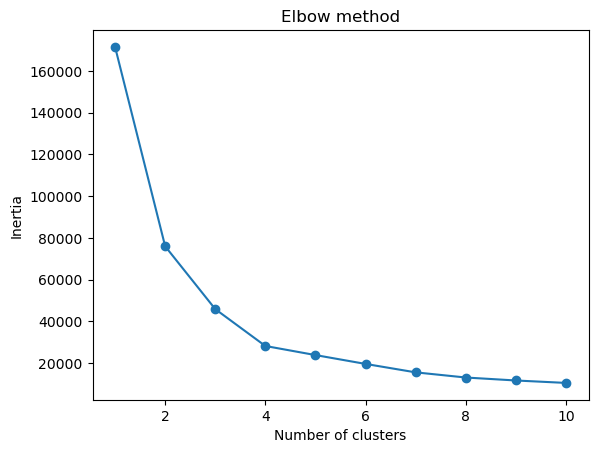

In [35]:
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

## Applying K-Means Algorithm

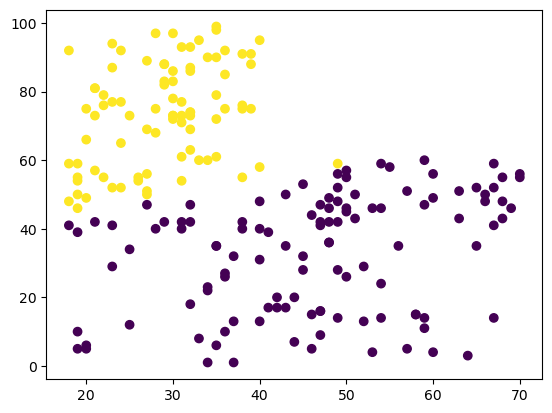

In [36]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(data)

plt.scatter(df['Age'],df['Spending Score (1-100)'],c=kmeans.labels_)
plt.show()